# EDA_clean.ipynb
### Exploratory Data Analysis — CMAPSS FD001 (Jet Engine RUL Prediction)


## 1. Introduction
This notebook performs Exploratory Data Analysis (EDA) on the **NASA C-MAPSS FD001** turbofan engine dataset.

Goals:
- Understand dataset structure
- Explore sensor behavior and operational settings
- Compute Remaining Useful Life (RUL)
- Analyze sensor correlations
- Prepare insights for modeling


## 2. Load Dataset
Load the FD001 training set and assign proper column names.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Load FD001
df = pd.read_csv("../data/train_FD001.txt", sep=" ", header=None)
df = df.dropna(axis=1, how="all")  # remove filler spaces

# Column names
col_names = ["unit", "cycle"] +             [f"op_setting_{i}" for i in range(1,4)] +             [f"sensor_{i}" for i in range(1,22)]

df.columns = col_names
df.head()

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## 3. Dataset Overview

In [2]:
print("Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

df.describe().T

Shape: (20631, 26)

Data Types:
unit              int64
cycle             int64
op_setting_1    float64
op_setting_2    float64
op_setting_3    float64
sensor_1        float64
sensor_2        float64
sensor_3        float64
sensor_4        float64
sensor_5        float64
sensor_6        float64
sensor_7        float64
sensor_8        float64
sensor_9        float64
sensor_10       float64
sensor_11       float64
sensor_12       float64
sensor_13       float64
sensor_14       float64
sensor_15       float64
sensor_16       float64
sensor_17         int64
sensor_18         int64
sensor_19       float64
sensor_20       float64
sensor_21       float64
dtype: object

Missing Values:
unit            0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_

,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


## 4. Compute Remaining Useful Life (RUL)

In [3]:
# Compute max cycle per engine
max_cycle = df.groupby("unit")["cycle"].max().rename("max_cycle")
df = df.merge(max_cycle, on="unit")
df["RUL"] = df["max_cycle"] - df["cycle"]

df.drop(columns=["max_cycle"], inplace=True)
df.head()

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


## 5. RUL Distribution

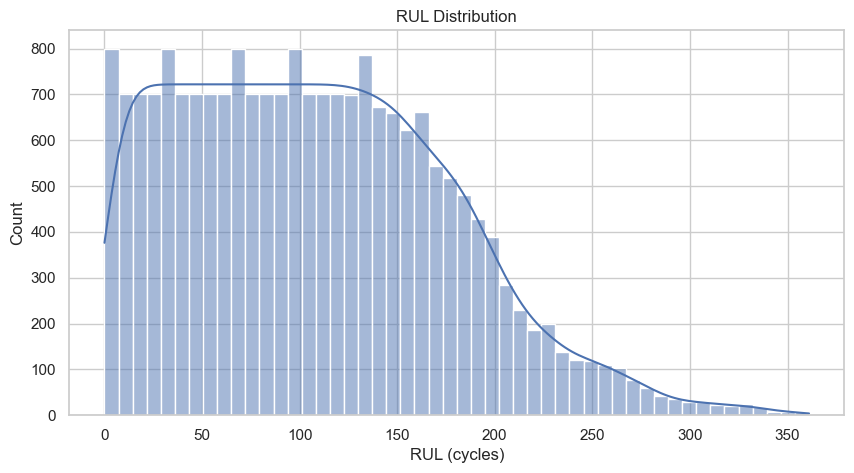

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df["RUL"], bins=50, kde=True)
plt.title("RUL Distribution")
plt.xlabel("RUL (cycles)")
plt.show()

## 6. Correlation Heatmap (Sensors & Operational Settings)

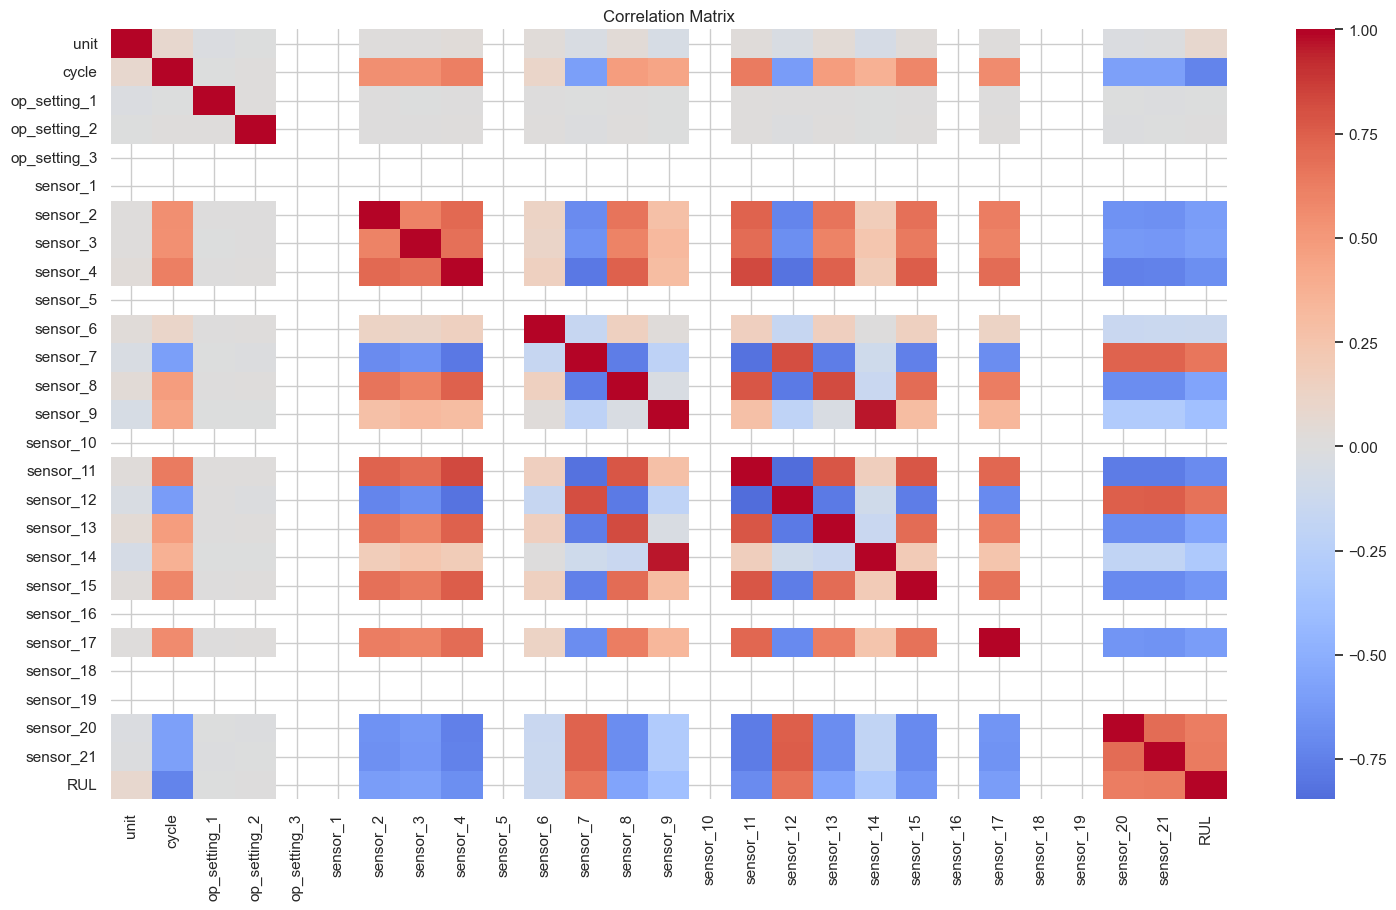

In [5]:
plt.figure(figsize=(18,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

## 7. Sensor Trends Over Time (Unit 1 Example)

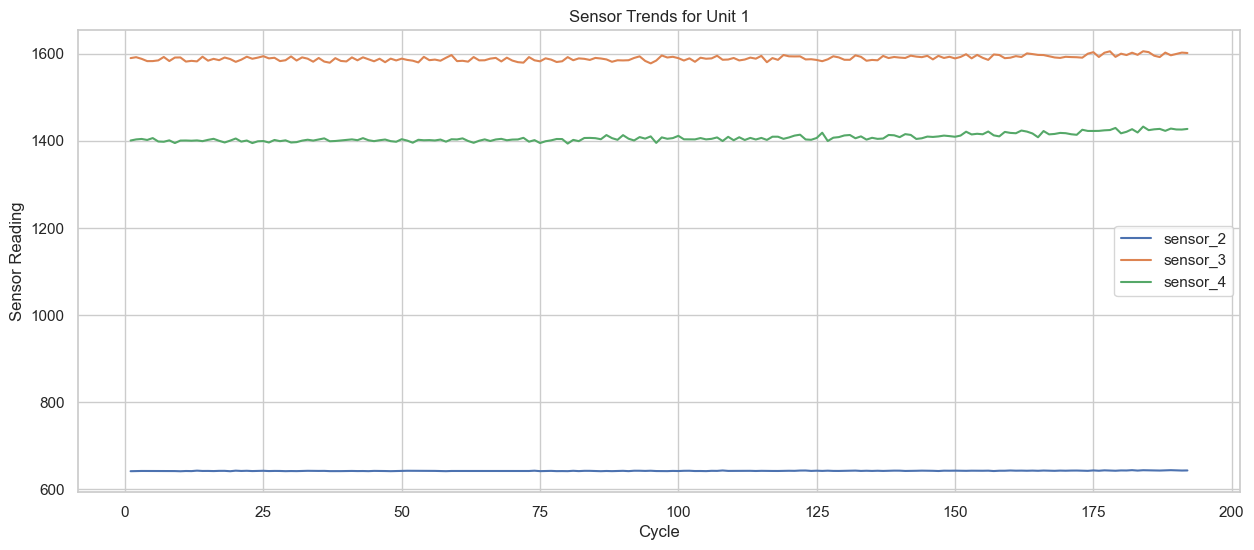

In [6]:
unit1 = df[df.unit == 1]

plt.figure(figsize=(15,6))
for s in ["sensor_2", "sensor_3", "sensor_4"]:
    plt.plot(unit1["cycle"], unit1[s], label=s)

plt.title("Sensor Trends for Unit 1")
plt.xlabel("Cycle")
plt.ylabel("Sensor Reading")
plt.legend()
plt.show()

## 8. Basic Feature Engineering
Rolling mean and standard deviation features help models capture degradation trends.

In [7]:
sensor_cols = [c for c in df.columns if "sensor" in c]

for w in [5, 20]:
    for col in sensor_cols:
        df[f"{col}_rollmean_{w}"] = df.groupby("unit")[col].rolling(w).mean().reset_index(level=0, drop=True)
        df[f"{col}_rollstd_{w}"]  = df.groupby("unit")[col].rolling(w).std().reset_index(level=0, drop=True)

df.head()

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL,sensor_1_rollmean_5,sensor_1_rollstd_5,sensor_2_rollmean_5,sensor_2_rollstd_5,sensor_3_rollmean_5,sensor_3_rollstd_5,sensor_4_rollmean_5,sensor_4_rollstd_5,sensor_5_rollmean_5,sensor_5_rollstd_5,sensor_6_rollmean_5,sensor_6_rollstd_5,sensor_7_rollmean_5,sensor_7_rollstd_5,sensor_8_rollmean_5,sensor_8_rollstd_5,sensor_9_rollmean_5,sensor_9_rollstd_5,sensor_10_rollmean_5,sensor_10_rollstd_5,sensor_11_rollmean_5,sensor_11_rollstd_5,sensor_12_rollmean_5,sensor_12_rollstd_5,sensor_13_rollmean_5,sensor_13_rollstd_5,sensor_14_rollmean_5,sensor_14_rollstd_5,sensor_15_rollmean_5,sensor_15_rollstd_5,sensor_16_rollmean_5,sensor_16_rollstd_5,sensor_17_rollmean_5,sensor_17_rollstd_5,sensor_18_rollmean_5,sensor_18_rollstd_5,sensor_19_rollmean_5,sensor_19_rollstd_5,sensor_20_rollmean_5,sensor_20_rollstd_5,sensor_21_rollmean_5,sensor_21_rollstd_5,sensor_1_rollmean_20,sensor_1_rollstd_20,sensor_2_rollmean_20,sensor_2_rollstd_20,sensor_3_rollmean_20,sensor_3_rollstd_20,sensor_4_rollmean_20,sensor_4_rollstd_20,sensor_5_rollmean_20,sensor_5_rollstd_20,sensor_6_rollmean_20,sensor_6_rollstd_20,sensor_7_rollmean_20,sensor_7_rollstd_20,sensor_8_rollmean_20,sensor_8_rollstd_20,sensor_9_rollmean_20,sensor_9_rollstd_20,sensor_10_rollmean_20,sensor_10_rollstd_20,sensor_11_rollmean_20,sensor_11_rollstd_20,sensor_12_rollmean_20,sensor_12_rollstd_20,sensor_13_rollmean_20,sensor_13_rollstd_20,sensor_14_rollmean_20,sensor_14_rollstd_20,sensor_15_rollmean_20,sensor_15_rollstd_20,sensor_16_rollmean_20,sensor_16_rollstd_20,sensor_17_rollmean_20,sensor_17_rollstd_20,sensor_18_rollmean_20,sensor_18_rollstd_20,sensor_19_rollmean_20,sensor_19_rollstd_20,sensor_20_rollmean_20,sensor_20_rollstd_20,sensor_21_rollmean_20,sensor_21_rollstd_20
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 9. Key EDA Insights
- RUL distribution is heavily right‑skewed.
- Several sensors show strong correlations (sensor_2, sensor_3, sensor_4).
- Trends over cycles indicate progressive degradation.
- Rolling statistics create smoother signals helpful for predictive modeling.


## 10. Export Cleaned Dataset

In [8]:
df.to_csv("../data/FD001_clean.csv", index=False)
"Saved as ../data/FD001_clean.csv" 

'Saved as ../data/FD001_clean.csv'

## 11. Next Steps — Modeling Pipeline
This EDA prepares the foundation for:
- Train/validation split by engine
- Baseline linear regression
- LSTM/GRU sequence models
- Gradient boosting models (XGBoost, LightGBM)
- Feature importance analysis
